In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [3]:
covid_data = pd.read_csv('covid_19_clean_complete.csv')

In [4]:
covid_data.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,1/22/20,0,0,0
7,NaN,Armenia,40.0691,45.0382,1/22/20,0,0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0,0,0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0,0


In [5]:
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sb

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


/home/andreiagouveia23/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/andreiagouveia23/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


''

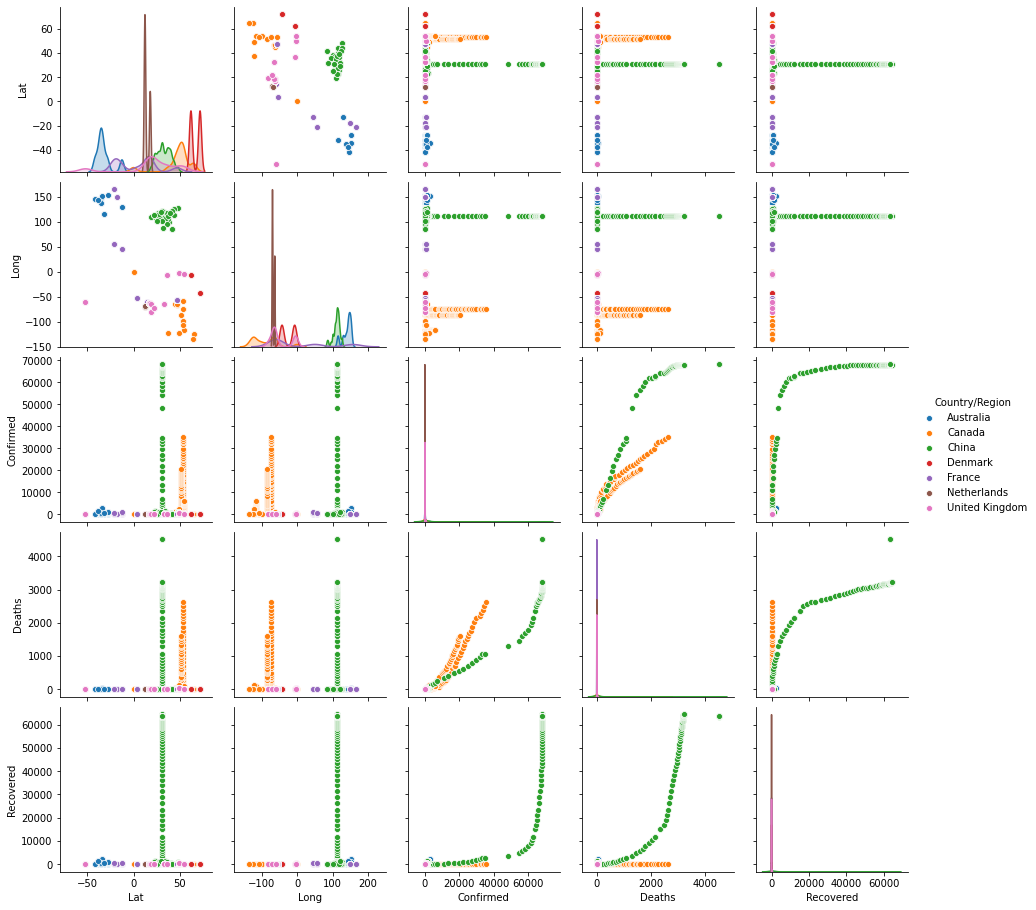

In [6]:
sb.pairplot(covid_data.dropna(), hue='Country/Region')
;

In [7]:
covid_data.drop(['Province/State', 'Lat', 'Long'],axis=1, inplace=True)
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

In [8]:
covid_data.head(10)

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Albania,2020-01-22,0,0,0
2,Algeria,2020-01-22,0,0,0
3,Andorra,2020-01-22,0,0,0
4,Angola,2020-01-22,0,0,0
5,Antigua and Barbuda,2020-01-22,0,0,0
6,Argentina,2020-01-22,0,0,0
7,Armenia,2020-01-22,0,0,0
8,Australia,2020-01-22,0,0,0
9,Australia,2020-01-22,0,0,0


In [9]:
#aggregates de countries by date
covid_data = covid_data.groupby(['Country/Region', 'Date'])[['Confirmed', 'Deaths', 'Recovered']].apply(sum)

#eliminates rows with no suspected, no deaths and no cured
covid_data = covid_data[(covid_data.T != 0).any()] 

#get group by columns back
covid_data.reset_index(inplace=True) 

#substructs the mim date from the current date (and returns the result in days - dt.days)
covid_data['Ellapsed Days'] = (covid_data['Date'] - covid_data.groupby('Country/Region')['Date'].transform('min')).dt.days

covid_data.head(10)

,Country/Region,Date,Confirmed,Deaths,Recovered,Ellapsed Days
0,Afghanistan,2020-02-24,1,0,0,0
1,Afghanistan,2020-02-25,1,0,0,1
2,Afghanistan,2020-02-26,1,0,0,2
3,Afghanistan,2020-02-27,1,0,0,3
4,Afghanistan,2020-02-28,1,0,0,4
5,Afghanistan,2020-02-29,1,0,0,5
6,Afghanistan,2020-03-01,1,0,0,6
7,Afghanistan,2020-03-02,1,0,0,7
8,Afghanistan,2020-03-03,1,0,0,8
9,Afghanistan,2020-03-04,1,0,0,9


In [10]:
#get countries present in covid data and removing trailing white spaces
covid_data_country_unique = covid_data['Country/Region'].drop_duplicates().str.strip()
pd.set_option('display.max_rows', covid_data_country_unique.shape[0]+1)
print(covid_data_country_unique)

# Get names of indexes for which column Country/Region is not a country and deleting these rows indexes from dataFrame
covid_data.drop(covid_data[covid_data['Country/Region'] == 'Diamond Princess' ].index , inplace=True)
covid_data.drop(covid_data[covid_data['Country/Region'] == 'MS Zaandam' ].index , inplace=True)
covid_data.drop(covid_data[covid_data['Country/Region'] == 'Holy See' ].index , inplace=True)

0                             Afghanistan
74                                Albania
134                               Algeria
207                               Andorra
274                                Angola
323                   Antigua and Barbuda
379                             Argentina
445                               Armenia
513                             Australia
616                               Austria
689                            Azerbaijan
757                               Bahamas
810                               Bahrain
884                            Bangladesh
945                              Barbados
997                               Belarus
1067                              Belgium
1161                               Belize
1207                                Benin
1260                               Bhutan
1323                              Bolivia
1381               Bosnia and Herzegovina
1445                             Botswana
1484                              

In [11]:
countries_data = pd.read_csv('countries_data.csv')

#removing trailing white spaces
countries_data_country = countries_data['Country'].str.strip()

#replacing & for and
countries_data_country.replace({'&': 'and'}, inplace=True, regex=True)

#particular cases
countries_data_country.replace({'Taiwan': 'Taiwan*'}, inplace=True, regex=True)
countries_data_country.replace({'Macedonia': 'North Macedonia'}, inplace=True, regex=True)
countries_data_country.replace({'Korea, South': 'South Korea'}, inplace=True, regex=True)
countries_data_country.replace({'United States': 'US'}, inplace=True, regex=True)
countries_data_country.replace({'Gambia, The': 'Gambia'}, inplace=True, regex=True)
countries_data_country.replace({'American Samoa': 'Samoa'}, inplace=True, regex=True)
countries_data_country.replace({'Czech Republic': 'Czechia'}, inplace=True, regex=True)
countries_data_country.replace({'Swaziland': 'Eswatini'}, inplace=True, regex=True)
countries_data_country.replace({'East Timor': 'Timor-Leste'}, inplace=True, regex=True)
countries_data_country.replace({'Bahamas, The': 'Bahamas'}, inplace=True, regex=True)
countries_data_country.replace({'Cape Verde': 'Cabo Verde'}, inplace=True, regex=True)
countries_data_country.replace({'Central African Rep.': 'Central African Republic'}, inplace=True, regex=True)
countries_data_country.replace({'Congo, Dem. Rep.': 'Congo (Kinshasa)'}, inplace=True, regex=True)
countries_data_country.replace({'Congo, Repub. of the': 'Congo (Brazzaville)'}, inplace=True, regex=True)


# Get names of indexes for which column Country/Region is not present in countries_data
index1 = covid_data[covid_data['Country/Region'] == 'Kosovo' ].index
index2 = covid_data[covid_data['Country/Region'] == 'West Bank and Gaza' ].index
index3 = covid_data[covid_data['Country/Region'] == 'Montenegro' ].index
index4 = covid_data[covid_data['Country/Region'] == 'South Sudan' ].index
 
# Delete these rows indexes from dataFrame
covid_data.drop(index1 , inplace=True)
covid_data.drop(index2 , inplace=True)
covid_data.drop(index3 , inplace=True)
covid_data.drop(index4 , inplace=True)

In [12]:
#get countries present in covid data and removing trailing white spaces
covid_data_country_unique = covid_data['Country/Region'].drop_duplicates().str.strip()

#get series with all the countries present in both data sets
df = pd.concat([covid_data_country_unique,countries_data_country])

#drop values that are repeated (keep the unique values)
unique_values = df.drop_duplicates(keep=False)

#sort them for an easy read
unique_values = unique_values.sort_values()

In [13]:
pd.set_option('display.max_rows', unique_values.shape[0]+1)
print(unique_values)

6                    Anguilla
10                      Aruba
22                    Bermuda
28         British Virgin Is.
38             Cayman Islands
47               Cook Islands
66              Faroe Islands
70              French Guiana
71           French Polynesia
74                 Gaza Strip
78                  Gibraltar
80                  Greenland
82                 Guadeloupe
83                       Guam
85                   Guernsey
91                  Hong Kong
99                Isle of Man
104                    Jersey
108                  Kiribati
109              Korea, North
116                   Lesotho
122                     Macau
130          Marshall Islands
131                Martinique
134                   Mayotte
136      Micronesia, Fed. St.
140                Montserrat
153        N. Mariana Islands
144                     Nauru
147      Netherlands Antilles
148             New Caledonia
157                     Palau
165               Puerto Rico
167       

In [14]:
#replacing the column with the country names with the revised column
countries_data_df = pd.DataFrame(countries_data)
countries_data_country_df = pd.DataFrame(countries_data_country)
new_countries_data_df = countries_data_df.assign(Country=countries_data_country_df['Country'])

In [15]:
#eliminating countries from the countries_data that are not in the covid_data
countries_data = new_countries_data_df

for x in unique_values:
  countries_data.drop(countries_data[countries_data['Country'] == x ].index , inplace=True)

In [16]:
#deleting useless columns from countries data
countries_data.drop(['Region', 'Net migration', 'Area (sq. mi.)','Coastline (coast/area ratio)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)','Crops (%)','Other (%)','Climate','Birthrate','Agriculture','Industry','Service'],axis=1, inplace=True)

In [17]:
#Saving cleaned data_set into to a file
countries_data.to_csv('countries_data_clean.csv')
covid_data.to_csv('covid_data_clean.csv')

In [18]:
#Enconde strings
def enconde_string(name):
    mybytes = name.encode('utf-8')
    return int.from_bytes(mybytes, 'little') 

covid_data['Country/Region'] = covid_data['Country/Region'].apply(enconde_string)
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

#Test case
variables = ['Cases' , 'Deaths']
    
#Independent Variables
X = covid_data.loc[:, ~covid_data.columns.isin(['Confirmed', 'Deaths'])]
#Dependent Variables
Y = {'Cases' : covid_data.loc[:,'Confirmed'] , 'Deaths' : covid_data.loc[:,'Deaths']}

# Displays X
display(X.tail())

# Displays Y
for key , value in Y.items():
    display(value.tail())    


,Country/Region,Date,Recovered,Ellapsed Days
12059,7311420690461976922,2020-05-03,5,44
12060,7311420690461976922,2020-05-04,5,45
12061,7311420690461976922,2020-05-05,5,46
12062,7311420690461976922,2020-05-06,5,47
12063,7311420690461976922,2020-05-07,5,48


12059    34
12060    34
12061    34
12062    34
12063    34
Name: Confirmed, dtype: int64

12059    4
12060    4
12061    4
12062    4
12063    4
Name: Deaths, dtype: int64

In [20]:
variablesScores = {}
#different nr of iterations to compare results
max_iter_array = [50, 100, 150, 200, 250]

for variable in variables:
    print('Starting training for ' , variable, '.')
    
    #Setting up training sets
    X_train, X_test, y_train, y_test = train_test_split(X,Y[variable])
    
    for it in max_iter_array:
        mlpr = MLPRegressor(max_iter = it)
        
        #need to fix date
        mlpr.fit(X_train , y_train)
        

Starting training for  Cases .


TypeError: float() argument must be a string or a number, not 'Timestamp'